In [1]:
from utilities_base import *

Using TensorFlow backend.


In [2]:
split_rng = [0.4, 0.5, 0.6, 0.7, 0.8]
def rolling_train(split):
    testPredict, model, testY = model_trainer('btc', 'CNN_LSTM', split)
    
    fig, axs = plt.subplots(1)
    fig.suptitle('\nWeights Distribution for {} Price movement Prediction'.format(coin))
    n, bins, patches = axs.hist(testPredict, 10, density=True, facecolor='b', alpha=0.5)
    axs.set_ylabel('Predicted Sign')
    axs.set_xlabel('Direction')

    axes = plt.gca()
    
    plt.grid(True, alpha=0.5)
    plt.rcParams["figure.figsize"] = (10,7)
    plt.show()
    
    #Results Analysis
    print("\n Results Analysis \n")
    CM, Accuracy, F1, AUC,tpr, fpr = ClassificationEvaluation(testY, testPredict, True)
    return Accuracy,AUC,F1

At 50.0% / 50.0% train/test split


Model Architecture 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 3, 32)       96        
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 3, 32)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 2, 64)       4160      
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                35800     
_______________________________________________________________

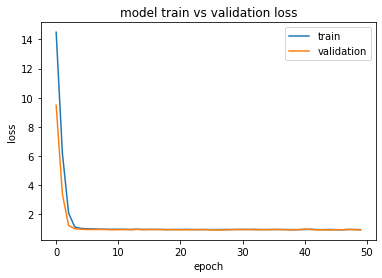

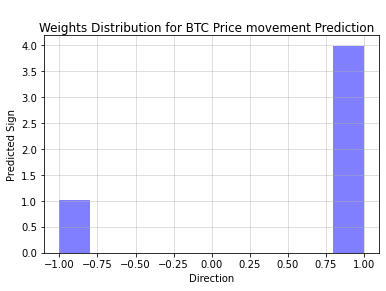


 Results Analysis 



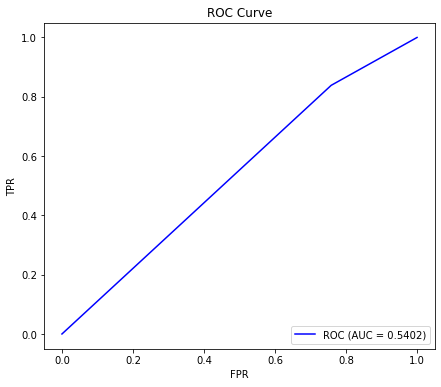

At 60.0% / 40.0% train/test split


Model Architecture 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_6 (TimeDist (None, None, 3, 32)       96        
_________________________________________________________________
time_distributed_7 (TimeDist (None, None, 3, 32)       0         
_________________________________________________________________
time_distributed_8 (TimeDist (None, None, 2, 64)       4160      
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_10 (TimeDis (None, None, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                35800     
_______________________________________________________________

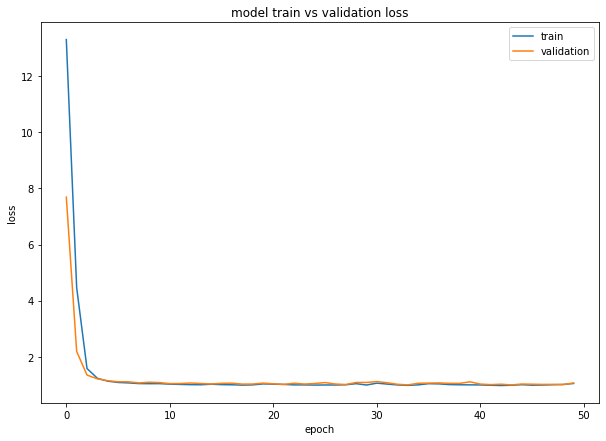

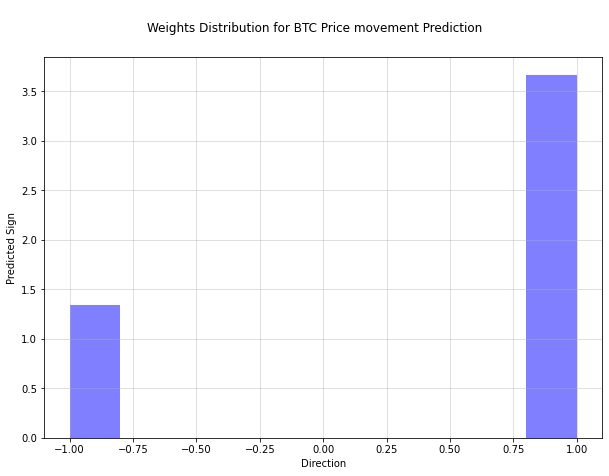


 Results Analysis 



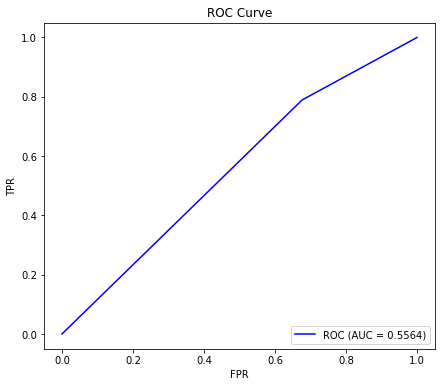

At 70.0% / 30.000000000000004% train/test split


Model Architecture 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_11 (TimeDis (None, None, 3, 32)       96        
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 3, 32)       0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, None, 2, 64)       4160      
_________________________________________________________________
time_distributed_14 (TimeDis (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_15 (TimeDis (None, None, 128)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                35800     
_________________________________________________

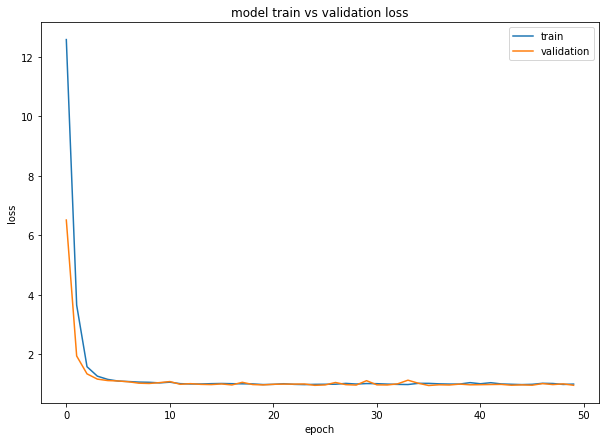

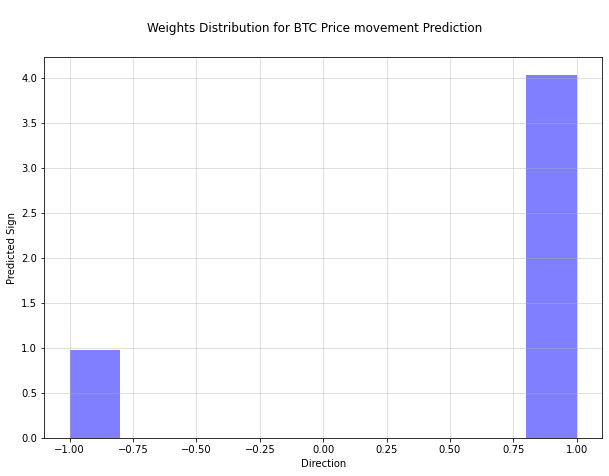


 Results Analysis 



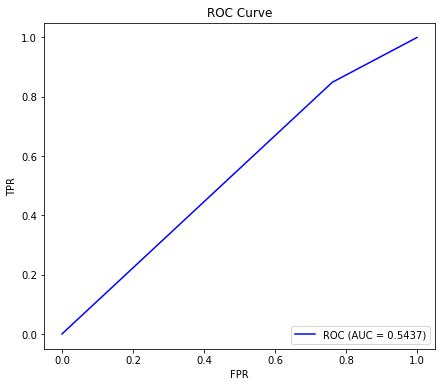

At 80.0% / 20.000000000000004% train/test split


Model Architecture 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_16 (TimeDis (None, None, 3, 32)       96        
_________________________________________________________________
time_distributed_17 (TimeDis (None, None, 3, 32)       0         
_________________________________________________________________
time_distributed_18 (TimeDis (None, None, 2, 64)       4160      
_________________________________________________________________
time_distributed_19 (TimeDis (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_20 (TimeDis (None, None, 128)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                35800     
_________________________________________________

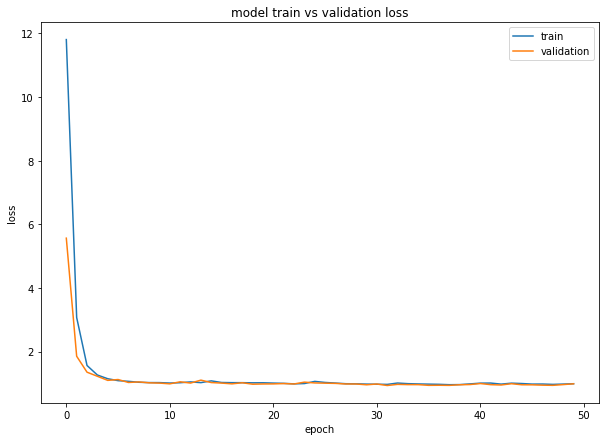

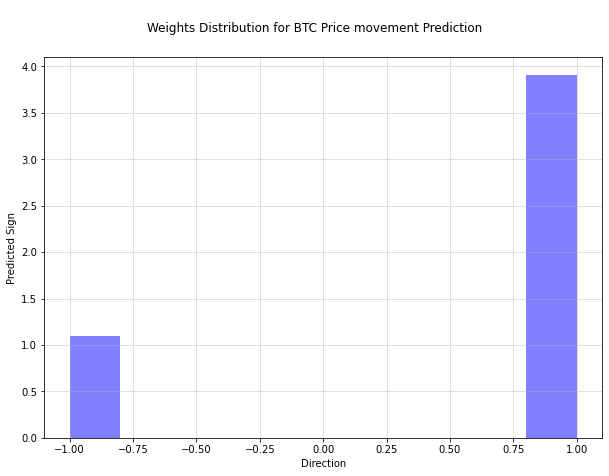


 Results Analysis 



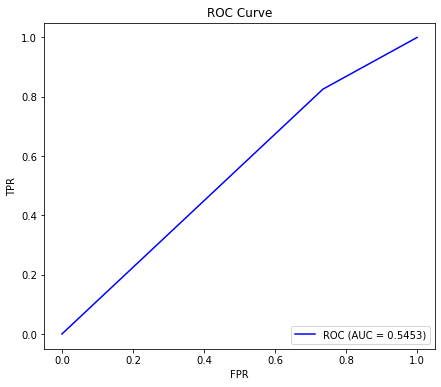

At 90.0% / 9.999999999999995% train/test split


Model Architecture 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_21 (TimeDis (None, None, 3, 32)       96        
_________________________________________________________________
time_distributed_22 (TimeDis (None, None, 3, 32)       0         
_________________________________________________________________
time_distributed_23 (TimeDis (None, None, 2, 64)       4160      
_________________________________________________________________
time_distributed_24 (TimeDis (None, None, 2, 64)       0         
_________________________________________________________________
time_distributed_25 (TimeDis (None, None, 128)         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                35800     
__________________________________________________

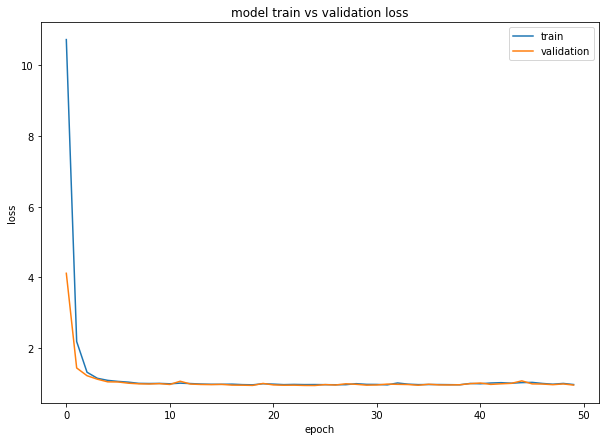

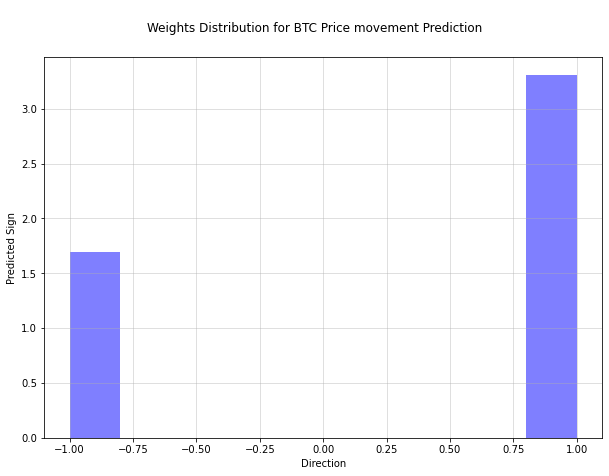


 Results Analysis 



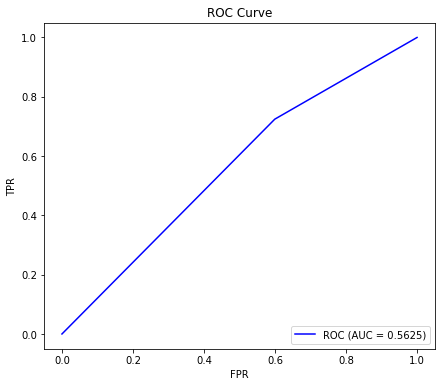

In [3]:
comparison = {}
for s in split_rng:
    print(f"At {(s+0.1)*100}% / {(1-s-0.1)*100}% train/test split\n")
    Accuracy,AUC,F1 = rolling_train(s)
    comparison[s] = [Accuracy,AUC,F1]

In [14]:
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format

#Accuracy,AUC,F1
comparison_df = pd.DataFrame(comparison, 
                            index = ['Accuracy','AUC','F1']).T
comparison_df.index = [f'{s*10}/{(10-s)*10}%' for s in range(5,10)]
print('Train/Test % Comparison (10% Validation Incl. in Train)\n')
comparison_df

Train/Test % Comparison (10% Validation Incl. in Train)



,Accuracy,AUC,F1
50/50%,0.5386,0.5402,0.6439
60/40%,0.5546,0.5564,0.6374
70/30%,0.5431,0.5437,0.6496
80/20%,0.5452,0.5453,0.6448
90/10%,0.5597,0.5625,0.6177
